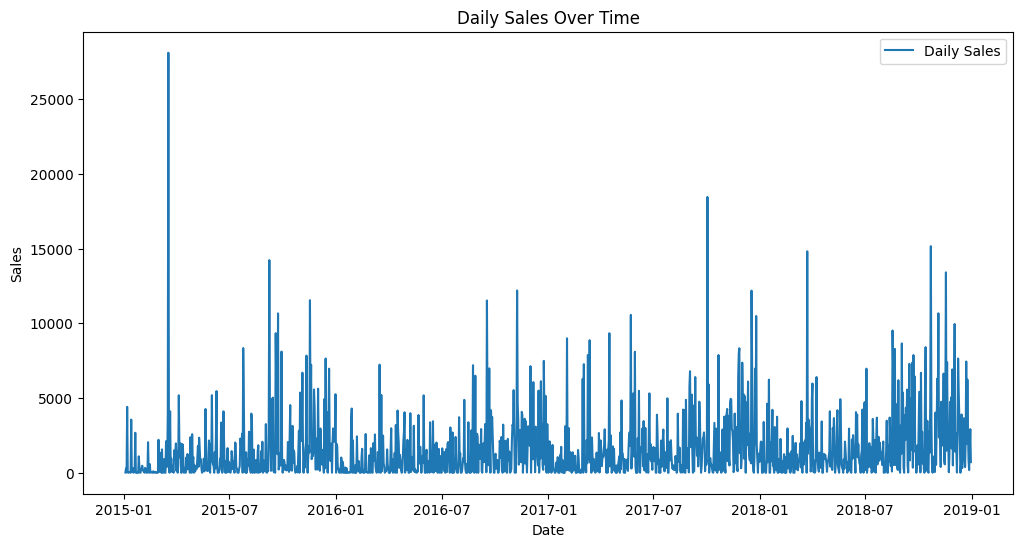

ADF Statistic: -4.926583375196245
p-value: 3.094891245873527e-05
The series is stationary.
ADF Statistic: -14.377499119666881
p-value: 9.271421499630717e-27
The series is stationary.


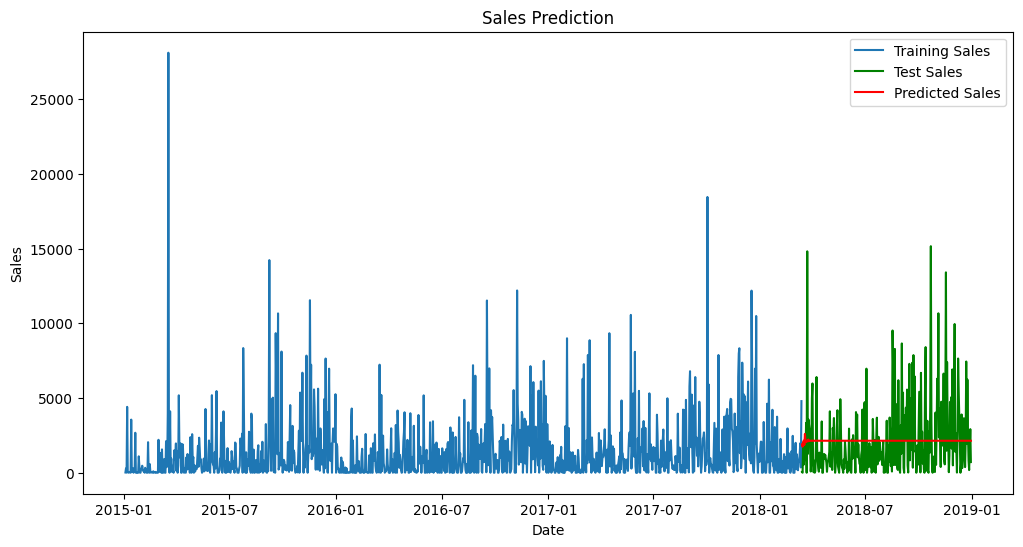

Root Mean Squared Error: 2501.2022989689226


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('train.csv')  # Replace with your file path
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)  # Convert to datetime
data.set_index('Order Date', inplace=True)


# Resample the data to daily sales
daily_sales = data.resample('D').sum()['Sales']

# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Check for stationarity using ADF test
def test_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

test_stationarity(daily_sales)

# Differencing to make the data stationary
daily_sales_diff = daily_sales.diff().dropna()
test_stationarity(daily_sales_diff)

# Split the data into train and test sets
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust order as necessary
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Sales')
plt.plot(test, label='Test Sales', color='green')
plt.plot(predictions, label='Predicted Sales', color='red')
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Root Mean Squared Error:', rmse)


In [3]:
import joblib

# Save the model to a file
joblib.dump(model_fit, 'arima_model.pkl')

from google.colab import files
files.download('arima_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>